# A New Package in Town: Missingno
## Visualize missing values for deep insights
<img src='images/puzzle.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://pixabay.com/users/422737-422737/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=654110'>Hebi B.</a>
        on 
        <a href='https://pixabay.com/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=654110'>Pixabay</a>
    </strong>
</figcaption>

### Introduction <small id='intro'></small>

Missing data is an unavoidable challenge in data science. Because it is so common, there are so many techniques, methods and packages to impute missing data. This can be both a blessing and a curse. While having a wide range of techniques and methods under your toolbelt may prepare you for any obstacle, choosing one specific solution to your unique case can be a real head-scratcher.

But is it really true that each case is unique? Turns out, no. Regardless of the data, missingness can be grouped into these three categories: Missing Completely At Random (MCAR), Missing At Random (MAR) and Missing Not At Random (MNAR). 

These 3 categories have their own patterns and features. Finding out which one of them the missing values fall into can significantly narrow down the set of solutions you can apply to. There are big differences between each missingness type and blindly implementing a random solution may seriously compromise the next stages of your workflow. 

In the next sections, you will learn about the differences between each missingness category in detail with examples. Mainly, we will use a visual approach to find the patterns of missingness using `Missingno` package. 

### Setup <small id='setup'></small>

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd
# Missingno to be imported later

# Visual setup
%config InlineBackend.figure_format = 'retina'

I generated a fake dataset to show you examples of different missingness types:

In [2]:
survey = pd.read_csv('data/missingness.csv')
survey.sample(5)

,first_name,last_name,age,favorite_os,IQ
3245,Abdul,Cox,48,iOS,NaN
5859,Julian,Miller,69,iOS,123.0
2788,Presley,Mendoza,48,iOS,107.0
6959,Mike,Green,21,AndroidOS,110.0
7753,Archer,Phillips,70,iOS,89.0


In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   first_name   9774 non-null   object 
 1   last_name    9770 non-null   object 
 2   age          10000 non-null  int64  
 3   favorite_os  9309 non-null   object 
 4   IQ           9432 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB


For the second dataset, I also downloaded 'Pima Indians Diabetes' dataset from Kaggle using this [link](https://www.kaggle.com/kumargh/pimaindiansdiabetescsv/download):

In [4]:
diabetes = pd.read_csv('data/pima-indians-diabetes.csv', na_values=0)
diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
1,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
3,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
4,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,NaN


In [5]:
# Rename the columns using their description from Kaggle
diabetes.columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'dpf', 'age', 'class']

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnancies     656 non-null    float64
 1   glucose         762 non-null    float64
 2   blood_pressure  732 non-null    float64
 3   skin_thickness  540 non-null    float64
 4   insulin         394 non-null    float64
 5   bmi             756 non-null    float64
 6   dpf             767 non-null    float64
 7   age             767 non-null    int64  
 8   class           267 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


### Missingno Basics <small id='basics'></small>

`missingno` is a very simple package designed specifically to visualize missing values in `pandas` data frames. It has 4 types of plots to visualize missing values: matrix, heatmap, bar blot and a dendogram. In this article, you will learn the two main plots: matrix and the correlation heatmap.

The package can be installed using `pip`:

```
pip install missingno
```

In [7]:
# Use 'msno' alias when importing
import missingno as msno

In the setup section, we imported a fake survey data with size 10k with various types of missingness:

In [8]:
survey.head()

,first_name,last_name,age,favorite_os,IQ
0,Steve,Cruz,63,iOS,125.0
1,Peyton,Evans,25,iOS,99.0
2,Archer,James,46,iOS,93.0
3,Tom,Miller,41,iOS,89.0
4,Leo,Nelson,42,iOS,108.0


Let's visualize its missing values using a matrix plot:

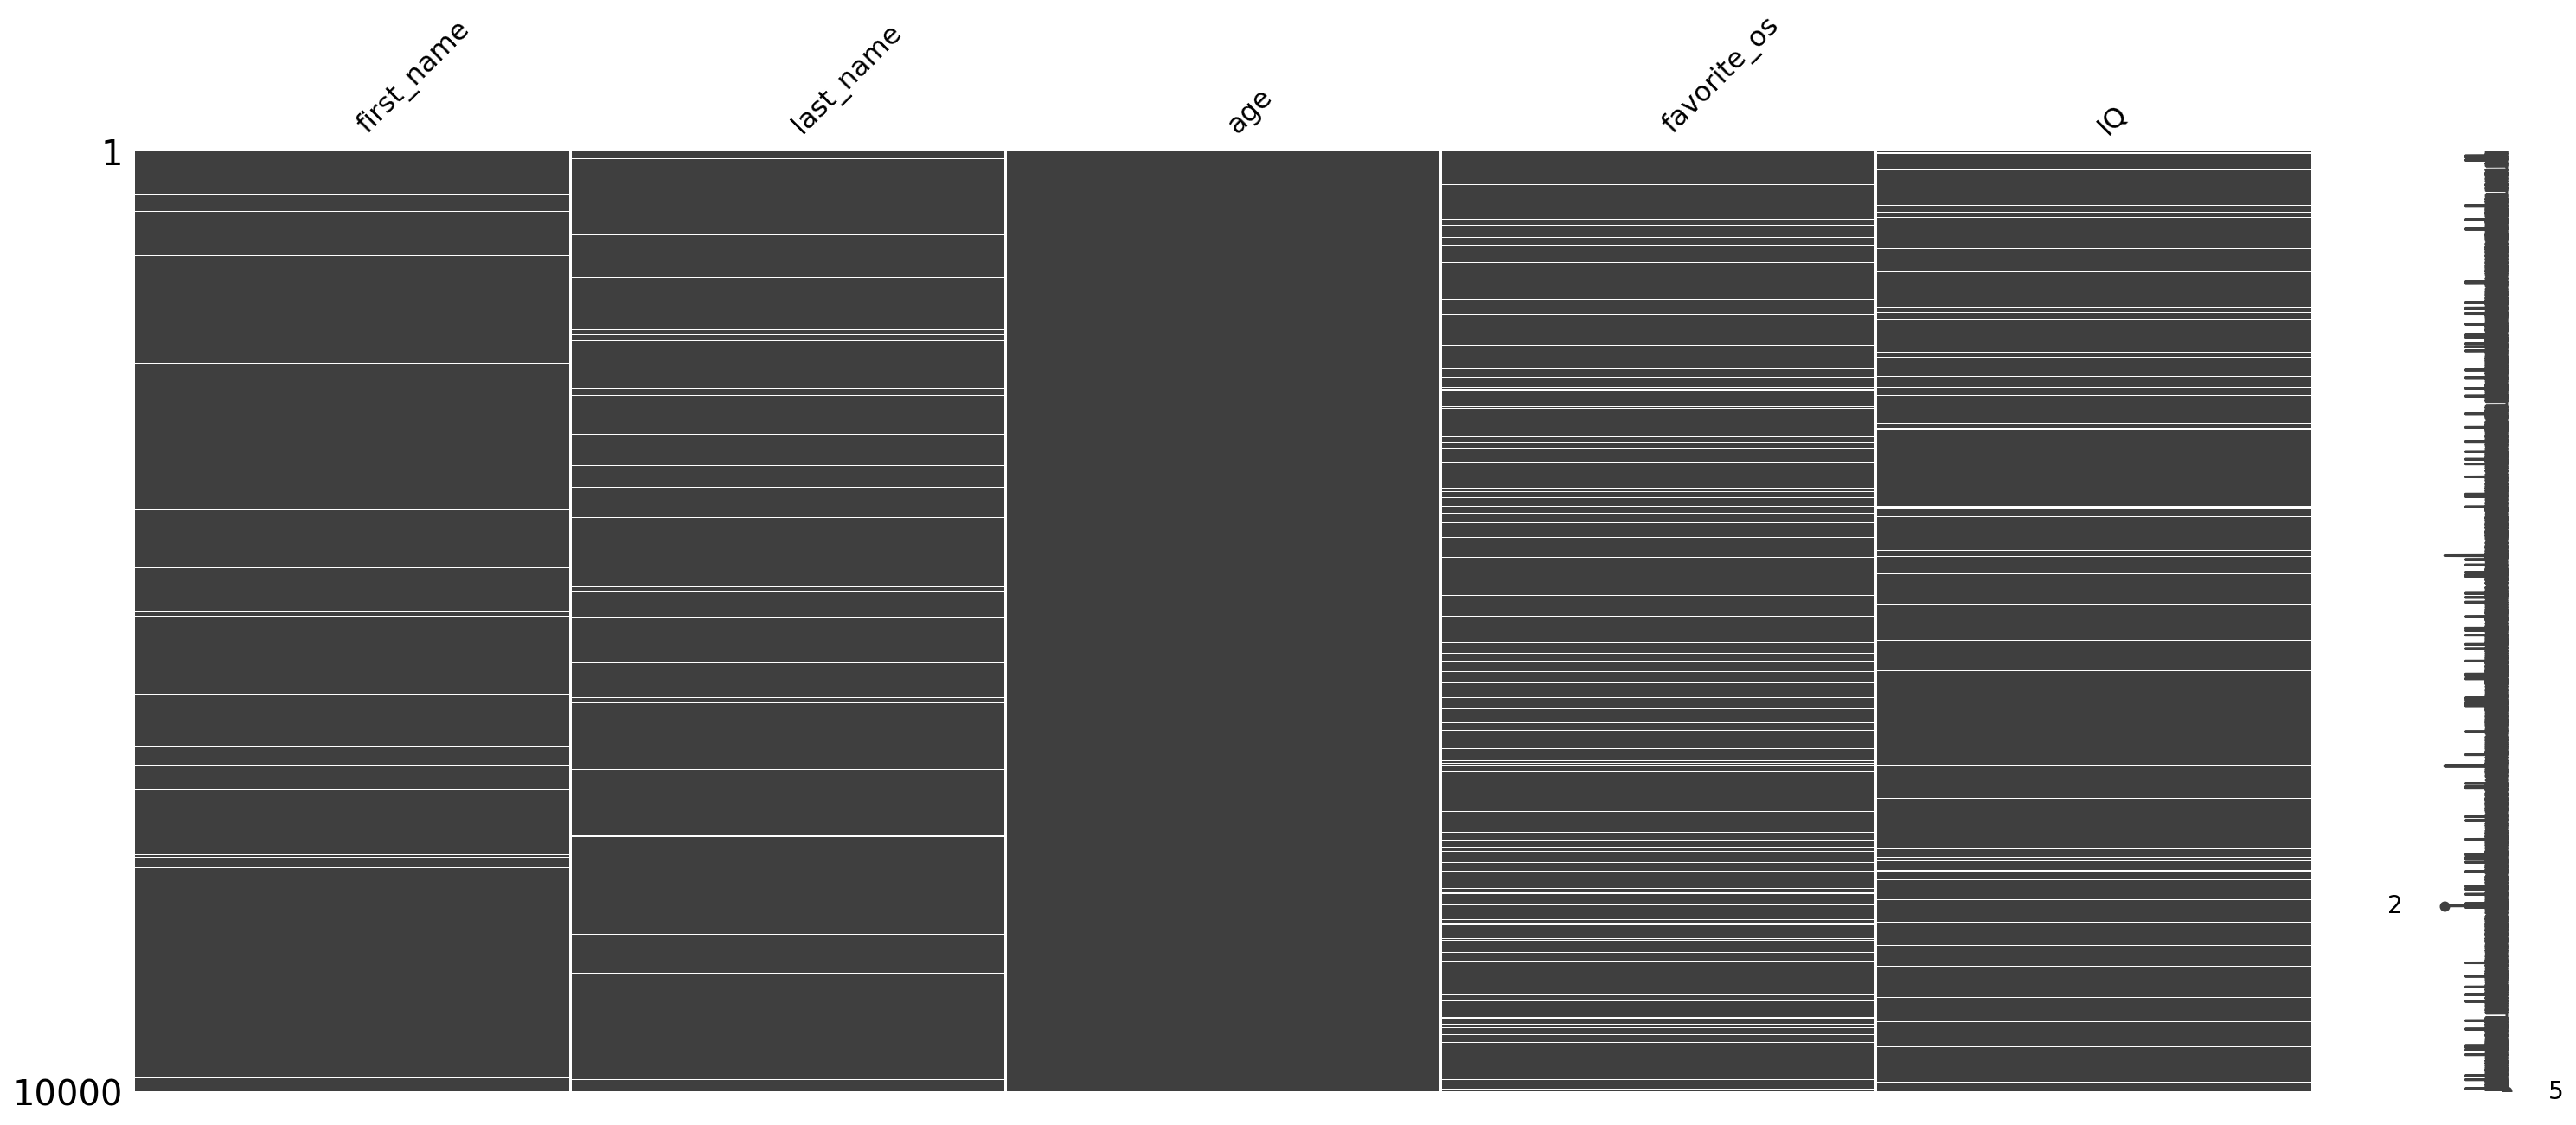

In [9]:
msno.matrix(survey);

In the matrix plot, each white line represents missing observations and the lines are visualized in the order they appear in the dataset, top to bottom. For large datasets like this, a cluster of missing values will form brighter white lines. For even larger ones, it is better to visualize only a random subset (`df.sample()`) of the dataset to get a better insight.

To find out if the missingness has any correlation with any of the existing variables, we will use a correlation heatmap. This time we will use the `diabetes` dataset:

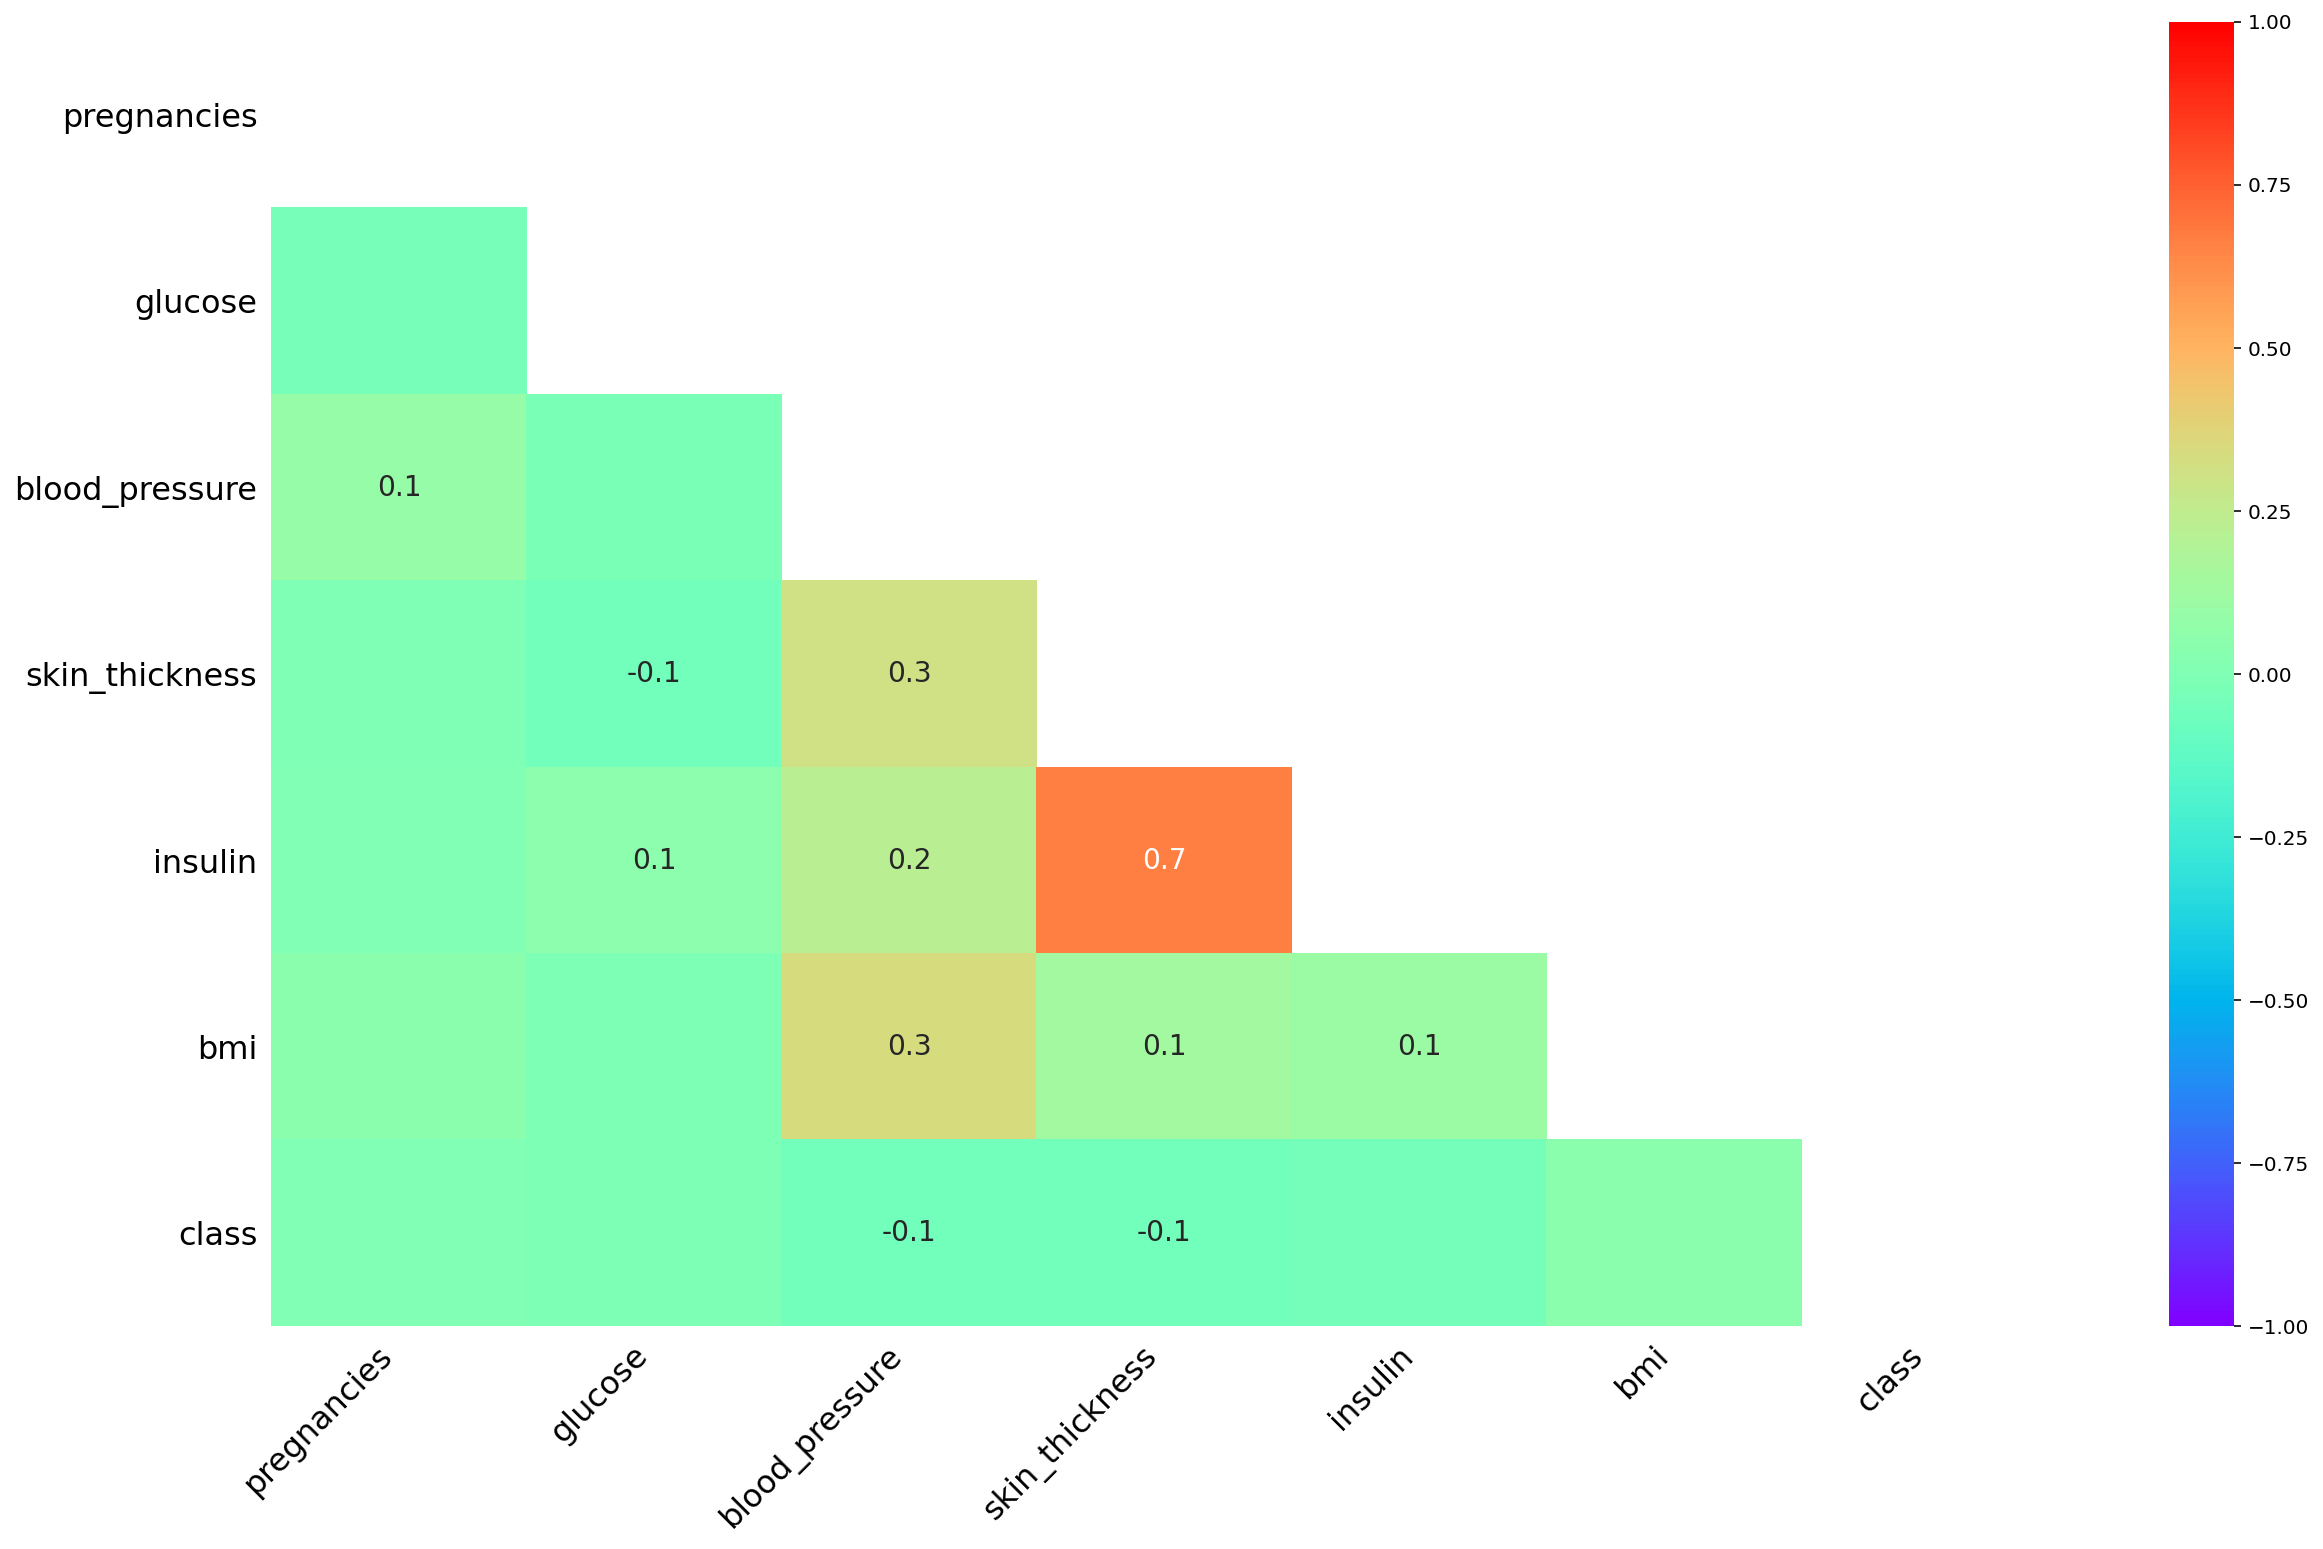

In [10]:
msno.heatmap(diabetes, cmap='rainbow');

The correlation heatmap will only include columns with missing values in the plot. The high scores indicate that missing values in one column is highly dependent on the missingness of another column.

One final plot, though not very important, is a bar plot:

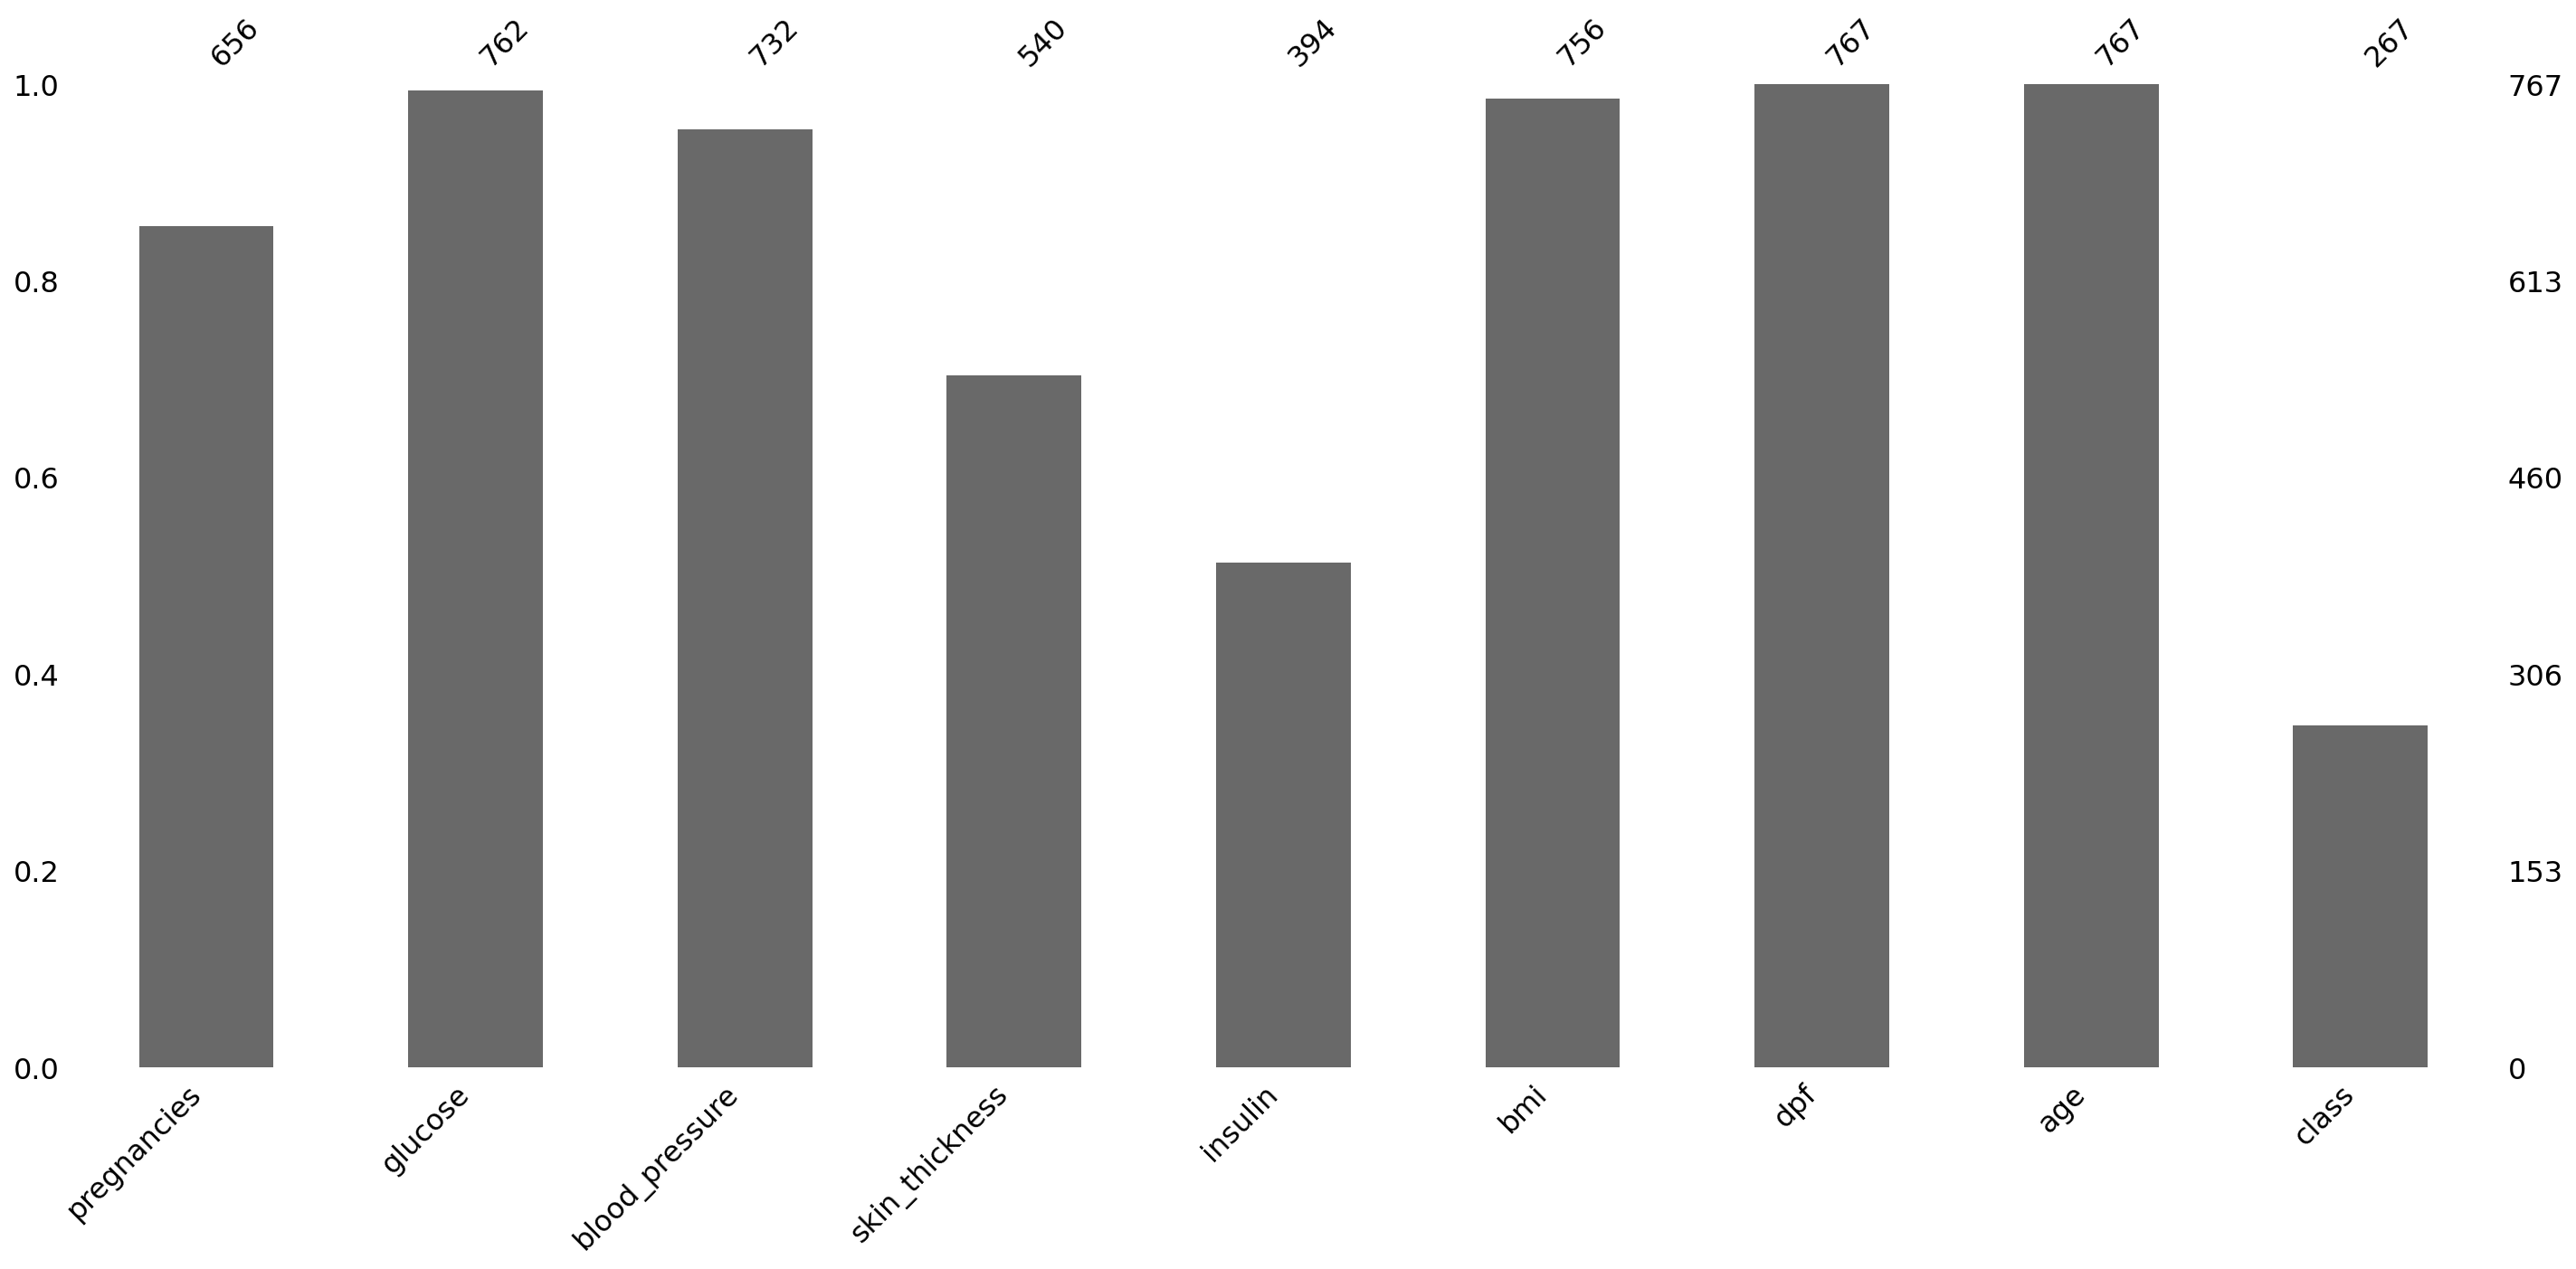

In [11]:
msno.bar(diabetes);

### Missingness Types: MCAR <small id='mcar'></small>

### Missingness Types: MAR <small id='mar'></small>

### Missingness Types: MNAR or NMAR <small id='mnar'></small>

### Missingness Correlation Heatmaps <small id='heatmap'></small>